1. Згенерувати N тривимiрних незалежних випадкових векторiв, в яких координати незалежнi,
першi двi координати мають показниковий розподiл з параметром 1, третя координата має
стандартний нормальний розподiл.

2. Реалiзувати алгоритм Козинця пошуку роздiляючого вектора для опуклої оболонки згенеро-
ваних векторiв. Алгоритм має працювати для довiльного N.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [14]:
from scipy.optimize import golden
import numpy as np
from scipy.optimize import golden


def compute_separating_vector(data_matrix, start_vector, max_iterations=200):
    iteration_count = 0  # Counter for the number of iterations

    for row_idx in range(data_matrix.shape[0]):
        iteration_count += 1
        if iteration_count > max_iterations:
            raise RuntimeError(
                "Exceeded maximum allowed iterations. Algorithm did not converge."
            )

        dot_product = np.dot(data_matrix[row_idx], start_vector)

        if dot_product <= 0:
            print("\nConflict found: dot product <= 0")
            print("Conflicting row index:", row_idx)
            print("Conflicting row vector:", data_matrix[row_idx])
            print("Current vector:", start_vector)

            conflicting_vector = data_matrix[row_idx]

            # Minimize the cost func
            def cost_function(scale_factor):
                return np.linalg.norm(
                    (1 - scale_factor) * start_vector
                    + scale_factor * conflicting_vector
                )

            optimal_factor = golden(cost_function, full_output=True)[0]

            # Update the separ vector
            updated_vector = (
                1 - optimal_factor
            ) * start_vector + optimal_factor * conflicting_vector
            print("Updated vector after adjustment:", updated_vector)

            # Recursive call
            start_vector = compute_separating_vector(
                data_matrix, updated_vector, max_iterations
            )
            # If all conditions are satisfied, return the final vector
    print("Final vector achieved in", iteration_count, "iterations.")
    return start_vector


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def visualize_vectors(input_vectors, sep_vector, marker_size=100):
    """
    Visualize 3D vectors and highlight a separating vector.

    Parameters:
        input_vectors (numpy.ndarray): Array of 3D input vectors to plot.
        sep_vector (numpy.ndarray): The separating vector to highlight.
        marker_size (int): Size of the marker for the separating vector.
    """
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot for the input vectors
    ax.scatter(
        input_vectors[:, 0],
        input_vectors[:, 1],
        input_vectors[:, 2],
        c="blue",
        marker="o",
        label="Input Vectors",
    )

    # Highlight the separating vector
    ax.scatter(
        sep_vector[0],
        sep_vector[1],
        sep_vector[2],
        c="red",
        marker="^",
        s=marker_size,
        label="Separating Vector",
    )

    # Add labels, title, and legend
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("3D Visualization of Vectors")
    ax.legend()

    # Show the plot
    plt.show()


Conflict found: dot product <= 0
Conflicting row index: 10
Conflicting row vector: [ 0.29659188  0.33978902 -1.17033857]
Current vector: [1.53622201 0.50949241 1.02921985]
Updated vector after adjustment: [ 0.7125871  0.3967381 -0.4322105]

Conflict found: dot product <= 0
Conflicting row index: 2
Conflicting row vector: [0.23014401 0.29828874 1.78459661]
Current vector: [ 0.7125871  0.3967381 -0.4322105]
Updated vector after adjustment: [0.58713014 0.37113683 0.14425932]
Final vector achieved in 33 iterations.
Final vector achieved in 33 iterations.
Final vector achieved in 33 iterations.


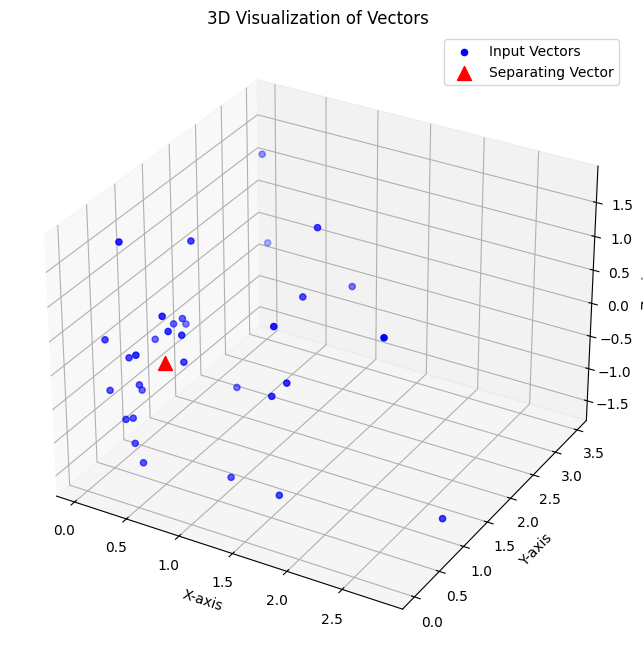

In [16]:
N = 33
data = np.column_stack(
    [
        np.random.exponential(1, size=(N, 1)),
        np.random.exponential(1, size=(N, 1)),
        np.random.standard_normal(size=(N, 1)),
    ]
)

sep_vec = compute_separating_vector(data_matrix=data, start_vector=data[4])

visualize_vectors(data, sep_vector=sep_vec)